# Analisi dei dati in Python 

Boolean Data Week | 18 ottobre 2022


## La libreria Pandas ⚡︎



Pandas è la libreria più utilizzata nell'analisi dei dati, infatti permette di caricare un dataset in Python e salvarlo in un particolare oggetto chiamato **Data Frame**, il quale è un insieme di righe e colonne che può essere vista come una matrice indicizzata (di fatto possiamo paragonarlo alla tipica tabella che troviamo nei fogli di calcolo). 

Per prima cosa dobbiamo importare la libreria ed è uso comune importare `pandas` utilizzando l'alias `pd` per un semplice motivo di praticità:

In [44]:
import pandas as pd

### Caricare i dati 

Ci sono diverse modalità per caricare dei dati, i quali possono essere in diversi formati. Iniziamo caricando un dataset in [formato csv](https://www.html.it/articoli/file-csv-cosa-sono-come-si-aprono-e-come-crearli/) (che sta per comma separated values) e che è stato salvato in [questa pagina web](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv): 

In [45]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv')
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


Il dataset, cha abbiamo appena salvato come Data Frame su un oggetto di nome `df`, contiene dati sulle misurazioni di caratteristiche fisiche di alcune popolazioni di pinguini. 

Possiamo usare il metodo `.info()` sul nostro Data Frame `df` per ottenere delle informazioni generali sulla composizione dei nostri dati: 

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


Oltre a fornirci informazioni sui nomi delle colonne e sulla tipologia di variabile (stringa o numerica), l'output ci dice anche quante righe ci sono nel dataset e se e quanti valori mancanti ci sono per ciascuna colonna; ad esempio: 

*  la colonna `species` non ha valori mancanti
*  la colonna `sex` ha 344 - 333 = 11 valori mancanti

### Metodi di manipolazione dei dati

Pandas offre diverse funzionalità e **metodi** che possono essere applicati agli oggetti di tipo Data Frame. Un **metodo è una funzione che esegue delle operazioni su un oggetto** (che a sua volta è stato instanziato da una classe, come ad esempio la classe Data Frame). 

#### Slicing

Come abbiamo visto per le liste, è possibile indicizzare anche i DataFrame, i quali hanno un doppio indice: uno per le righe e uno per le colonne del dataset. Ci sono [diversi metodi](https://pandas.pydata.org/docs/user_guide/indexing.html) per ottenere una specifica riga o colonna da un Data Frame ma, per non confondere troppo le idee, ne vedremo solo alcuni. 

**Slicing per riga**

L'indicatore `.loc[]` ci permette di individuare una certa riga andando a specificare il "label" della riga (in questo caso l'indice stesso) che vogliamo ottenere: 

In [47]:
df.loc[9]

species                 Adelie
island               Torgersen
bill_length_mm            42.0
bill_depth_mm             20.2
flipper_length_mm        190.0
body_mass_g             4250.0
sex                        NaN
Name: 9, dtype: object

In [48]:
# per selezionare più righe
df.loc[[2,9]]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


**Slicing per colonna**

L'indicatore `.loc[]` funziona anche per le colonne, ma questa volta dovremo andare a specificare il fatto che siamo interessati a queste (e non alle righe). Per fare ciò usiamo l'operatore `:` per chiedere di restituire **tutte le righe** e, dopo la `,` specifichiamo la colonna (o le colonne) che vogliamo selezionare:

In [49]:
df.loc[:,'bill_length_mm']

0      39.1
1      39.5
2      40.3
3       NaN
4      36.7
       ... 
339     NaN
340    46.8
341    50.4
342    45.2
343    49.9
Name: bill_length_mm, Length: 344, dtype: float64

In [50]:
# per selezionare specifiche righe e colonne
df.loc[:10,['species','bill_length_mm']]

,species,bill_length_mm
0,Adelie,39.1
1,Adelie,39.5
2,Adelie,40.3
3,Adelie,NaN
4,Adelie,36.7
5,Adelie,39.3
6,Adelie,38.9
7,Adelie,39.2
8,Adelie,34.1
9,Adelie,42.0


Dato che selezionare una o più colonne è un'operazione molto comune, c'è anche un metodo più pratico e veloce per fare questa operazione: 

In [51]:
df['bill_length_mm']

0      39.1
1      39.5
2      40.3
3       NaN
4      36.7
       ... 
339     NaN
340    46.8
341    50.4
342    45.2
343    49.9
Name: bill_length_mm, Length: 344, dtype: float64

#### Valori distinti

Ad esempio, il metodo `.unique()`, quando applicato alla colonna di un Data Frame, restituisce i **valori distinti (o unici)** contenuti in quella colonna: 

In [52]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

> L'equivalente del metodo `.unique()` nei fogli di calcolo è la funzionalità "remove duplicates" o la funzione "=UNIQUE()".

#### Filtrare i dati

Vediamo che ci sono tre specie di pinguini, se volessimo **filtrare** il Data Frame e vedere solo le osservazioni appartenenti alla specie 'Gentoo' ad esempio, possiamo usare l'operatore `[]` in questo modo: 

In [53]:
df[df['species'] == 'Gentoo']

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,FEMALE
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,MALE
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,FEMALE
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,MALE
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,MALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


> L'equivalente nei fogli di calcolo è il filtro di una colonna (il simbolo a imbuto). 

#### Funzioni di aggregazione

Se a questo punto volessimo conoscere il valor medio della colonna `body_mass_g` di questa specie di pinguini, basterebbe aggiungere alla riga precedente il metodo `.mean()` preceduto dal nome della colonna `['body_mass_g']`: 

In [59]:
df[df['species']=='Gentoo']['body_mass_g'].mean()

5076.016260162602

> L'equivalente nei fogli di calcolo sarebbe usare la funzione "=AVERAGE()" sulla colonna `body_mass_g` dopo aver applicato il filtro alla variabile `species`.

#### Raggruppamento dei dati

Per conoscere la media di tutte e tre le specie potremmo ripetere lo step precedente per tre volte (cambiando il nome della specie di volta in volta). Un modo più veloce ed efficiente di raggiungere lo stesso risultato è usare il metodo `.groupby()`. 

In [12]:
df.groupby('species', as_index = False)['body_mass_g'].mean()

,species,body_mass_g
0,Adelie,3700.662252
1,Chinstrap,3733.088235
2,Gentoo,5076.016260


> L'equivalente del metodo `.groupby()` nei fogli di calcolo sarebbe una tabella pivot. 

Quello di "group by" è un concetto importante nell'analisi dei dati e infatti lo si ritrova anche in SQL e volendo anche nei fogli di calcolo. 

Di fatto in una group by andiamo a **raggruppare tutte le righe** di una variabile che hanno la stessa categoria (ad esempio la specie dei pinguini). Una group by è sempre **seguita da una funzione di aggregazione** (come la somma o la media, ecc) perché avendo raggruppato tante righe dobbiamo riassumere le variabili numeriche con una funzione di sintesi, come ad esempio la somma o la media appunto. 

Un'altra funzione di aggregazione è il conteggio, se volessimo conoscere il numero di pinguini maschi e femmine, ad esempio, potremmo raggruppare per `sex` e poi contare il numero di righe usando il metodo `.size()`: 

In [13]:
df.groupby('sex', as_index = False).size()

,sex,size
0,FEMALE,165
1,MALE,168


## Un esempio reale

In [37]:
import pandas as pd

import seaborn as sns
sns.set_theme()
sns.set(rc={'figure.figsize':(11,7)})
from matplotlib import pyplot as plt

Dopo aver importato le librerie necessarie, carichiamo il nostro dataset: 

In [38]:
df = pd.read_csv("https://raw.githubusercontent.com/boolean-data-analytics/data/main/Superstore%20Data%20S.csv")
df.head()

,Order ID,Order Date,Country,Region,State,City,Category,Sub-Category,Product Name,Customer Name,Quantity,Sales,Discount,Profit
0,US-2019-103800,03/01/2019,United States,Central,Texas,Houston,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Darren Powers,2,16.448,0.2,5.5512
1,US-2019-112326,04/01/2019,United States,Central,Illinois,Naperville,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,Phillina Ober,2,3.540,0.8,-5.4870
2,US-2019-112326,04/01/2019,United States,Central,Illinois,Naperville,Office Supplies,Labels,Avery 508,Phillina Ober,3,11.784,0.2,4.2717
3,US-2019-112326,04/01/2019,United States,Central,Illinois,Naperville,Office Supplies,Storage,SAFCO Boltless Steel Shelving,Phillina Ober,3,272.736,0.2,-64.7748
4,US-2019-141817,05/01/2019,United States,East,Pennsylvania,Philadelphia,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,Mick Brown,3,19.536,0.2,4.8840


Questo dataset contiene dati fittizi relativi a un e-commerce che vende prodotti per l'ufficio.

Controlliamo il "tipo" di variabili presenti nel DataFrame:

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10194 entries, 0 to 10193
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       10194 non-null  object 
 1   Order Date     10194 non-null  object 
 2   Country        10194 non-null  object 
 3   Region         10194 non-null  object 
 4   State          10194 non-null  object 
 5   City           10194 non-null  object 
 6   Category       10194 non-null  object 
 7   Sub-Category   10194 non-null  object 
 8   Product Name   10194 non-null  object 
 9   Customer Name  10194 non-null  object 
 10  Quantity       10194 non-null  int64  
 11  Sales          10194 non-null  float64
 12  Discount       10194 non-null  float64
 13  Profit         10194 non-null  float64
dtypes: float64(3), int64(1), object(10)
memory usage: 1.1+ MB


Notiamo che ci sono 10194 righe e 14 colonne, non ci sono valori mancanti e i dati sono tutti stati interpretato correttamente secondo la loro tipologia. 

L'indice del dataframe va da 0 a 10193, a ribadire che in Python l'indicizzazione degli elementi parte dallo 0. 

### Analisi dei dati

Vediamo quanti paesi ci sono:

In [40]:
df['Country'].unique()

array(['United States', 'Canada'], dtype=object)

Noi siamo interessati soltanto agli Stati Uniti, filtriamo l'intero DataFrame e salviamo il risultato in un nuovo oggetto chiamato `us`: 

In [41]:
us = df[df['Country']=='United States']

In [42]:
us['Country'].unique()

array(['United States'], dtype=object)

In [43]:
us.head(3)

,Order ID,Order Date,Country,Region,State,City,Category,Sub-Category,Product Name,Customer Name,Quantity,Sales,Discount,Profit
0,US-2019-103800,03/01/2019,United States,Central,Texas,Houston,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",Darren Powers,2,16.448,0.2,5.5512
1,US-2019-112326,04/01/2019,United States,Central,Illinois,Naperville,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,Phillina Ober,2,3.540,0.8,-5.4870
2,US-2019-112326,04/01/2019,United States,Central,Illinois,Naperville,Office Supplies,Labels,Avery 508,Phillina Ober,3,11.784,0.2,4.2717


Guardiamo al margine (variabile `Profit`) per ciascuna categoria di prodotto (variabile `Category`): 

In [44]:
us.groupby('Category', as_index=False)['Profit'].sum()

,Category,Profit
0,Furniture,18451.2728
1,Office Supplies,122490.8008
2,Technology,145454.9481


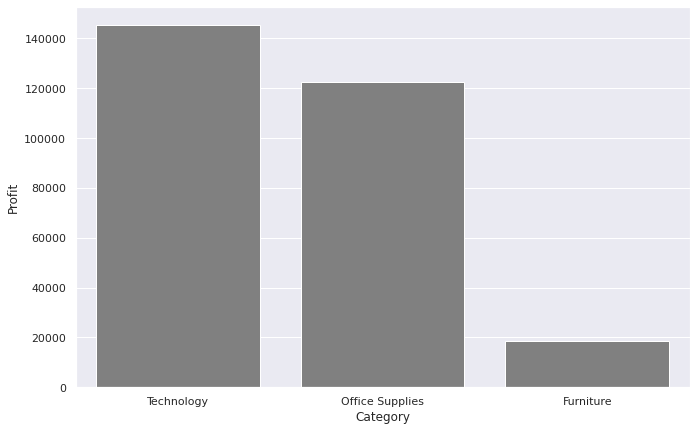

In [45]:
us_cat_profit = us.groupby('Category', as_index=False)['Profit'].sum().sort_values('Profit', ascending = False)
sns.barplot(x = 'Category', y = 'Profit', data=us_cat_profit, color='grey')
plt.show()

Notiamo che tutte e tre le categorie hanno un margine positivo, anche se la categoria Furniture sembra essere meno profittevole delle altre. 

Continuiamo la nostra analisi andando a raggruppare i dati per regione (variabile `Region`): 

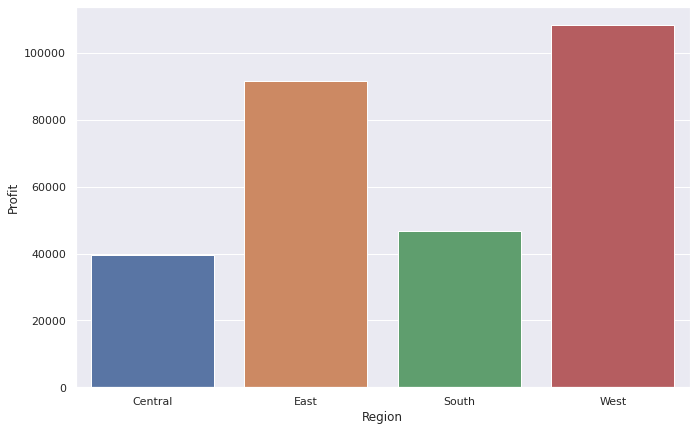

In [46]:
us_region_profit = us.groupby('Region', as_index=False)['Profit'].sum()
sns.barplot(x='Region', y='Profit', data=us_region_profit)
plt.show()

Anche qui non sembrano esserci grosse differenze tra le quattro regioni, anche se le regioni South e Central sono meno profittevoli di East e West. Potrebbe aver senso combinare le due variabili categoriche, andando cioè a raggruppare sia per `Category` che per `Region`:

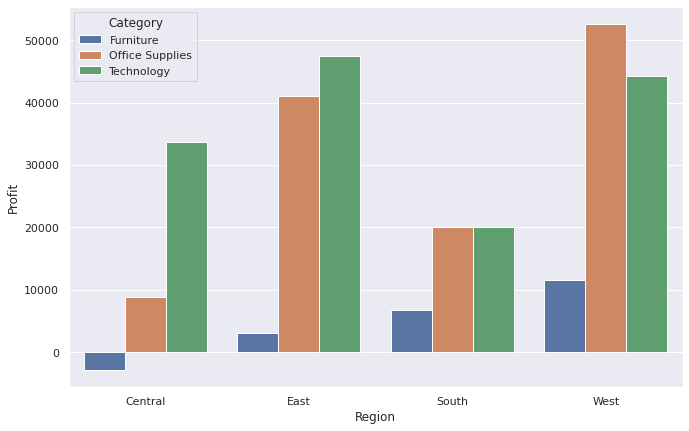

In [47]:
us_cat_region_profit = us.groupby(['Category', 'Region'], as_index=False)['Profit'].sum()
sns.barplot(x='Region', y='Profit', hue='Category', data=us_cat_region_profit)
plt.show()

Un'alternativa al grafico a barre può essere una tabella pivot: 

In [48]:
pd.pivot_table(data = us_cat_region_profit,
               values = 'Profit', 
               index = 'Category', 
               columns = 'Region', 
               aggfunc = 'sum')

Region,Central,East,South,West
Category,,,,
Furniture,-2871.0494,3046.1658,6771.2061,11504.9503
Office Supplies,8879.9799,41014.5791,19986.3928,52609.8490
Technology,33697.4320,47462.0351,19991.8314,44303.6496


Sembra che la categoria "Furniture" nella regione "Central" abbia dei problemi in quanto è l'unica ad avere dei profitti negativi. 

Investighiamo la cosa andando a filtrare il nostro dataset e creando un nuovo DataFrame, che chiamiamo `us_cntr_furn`, che conterrà solo i dati filtrati per la regione Central e la categoria Furniture: 

In [67]:
us_cntr_furn = us[(us['Category']=='Furniture') & (us['Region']=='Central')]

In [68]:
us_cntr_furn.shape

(481, 14)

Vediamo com'è distribuita la variabile `Profit` in questo nuovo dataset filtrato, per farlo creaiamo un [istogramma](http://tinlizzie.org/histograms/), ovvero un grafico che ci permette di visualizzare con che frequenza si verificano i diversi valori di questa metrica: 

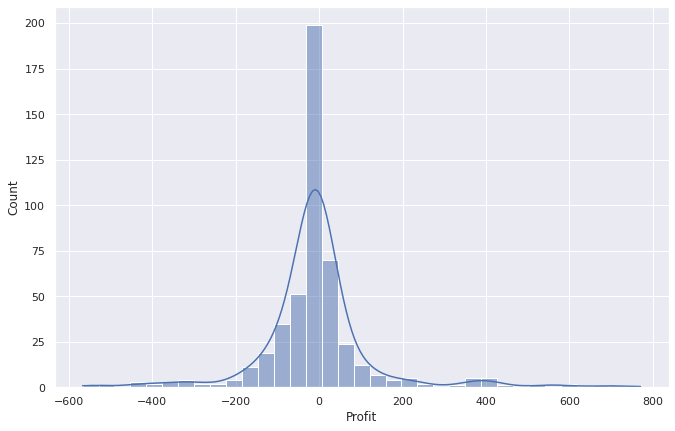

In [51]:
sns.histplot(data=us_cntr_furn, x='Profit', bins=35, kde=True)
plt.show()

Dall'immagine si vede chiaramente che la variable Profit è centrata sullo 0 ed ha sia valori positivi che negativi, con una maggior inclinazione verso quest'ultimi (infatti la somma del totale è negativa).

In [52]:
us_cntr_furn['Profit'].sum()

-2871.0494

Andiamo a investigare oltre e vediamo se ci sono delle **sotto-categorie** con margini particolarmente negativi: 

In [53]:
us_cntr_furn.groupby(['Sub-Category'], as_index=False)['Profit'].sum()

,Sub-Category,Profit
0,Bookcases,-1997.9043
1,Chairs,6592.7221
2,Furnishings,-3906.2168
3,Tables,-3559.6504


Vediamo che tre delle quattro sotto-categorie hanno un margine totale negativo; a questo punto ha senso investigare la distribuzione dei dati più nel dettaglio e un altro modo per studiare la distribuzione di una o più variabili è attraverso il [Box plot](https://www.khanacademy.org/math/statistics-probability/summarizing-quantitative-data/box-whisker-plots/a/box-plot-review): 

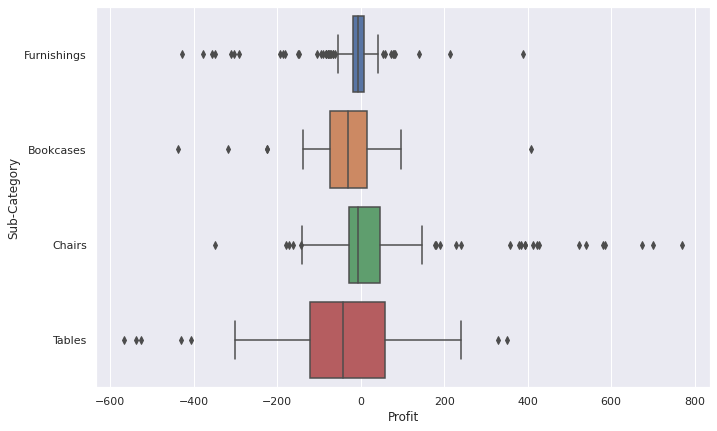

In [54]:
sns.boxplot(data=us_cntr_furn, x='Profit', y = 'Sub-Category')
plt.show()

Notiamo come sia la sotto-categoria Tables che Furnishing siano hanno molte osservazioni nella parte negativa della distribuzione, ma i loro Box plot hanno anche una forma molto diversa: Furnishing è molto concentrata in un'area di valori negativi ma non troppo elevati e ha un notevole numero di valori estremi. Tables invece ha meno valori estremi ma la sua distribuzione prende valori principalmente negativi su valori decisamente più elevati (negativamente) come mostrato dal Box plot.

Continuiamo la nostra analisi prendendo in esame un'altra variabile: lo **sconto** applicato a ciascun ordine: 

In [55]:
us_cntr_furn.groupby(['Sub-Category'], as_index=False)['Discount'].mean()

,Sub-Category,Discount
0,Bookcases,0.232800
1,Chairs,0.192857
2,Furnishings,0.403902
3,Tables,0.262500


Mettiamo le due metriche `Profit` e `Discount` una vicina all'altra e raggruppiamole per sotto-categoria:

In [56]:
us_profit_dscnt = us_cntr_furn.groupby(['Sub-Category'], as_index=False).agg(
    profit_sum = ('Profit', 'sum'), 
    discount_avg = ('Discount', 'mean')
)
us_profit_dscnt

,Sub-Category,profit_sum,discount_avg
0,Bookcases,-1997.9043,0.232800
1,Chairs,6592.7221,0.192857
2,Furnishings,-3906.2168,0.403902
3,Tables,-3559.6504,0.262500


Questo ci permette di andare a creare un grafico a dispersione (**scatterplot**) il quale ci permette di verificare la relazione tra queste due metriche:

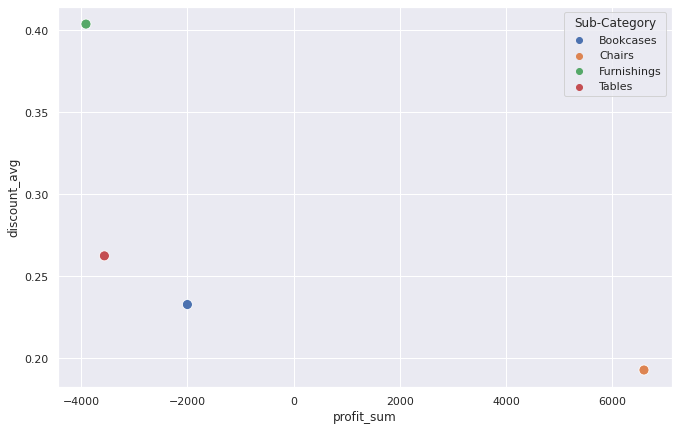

In [57]:
sns.scatterplot(data=us_profit_dscnt, x='profit_sum', y='discount_avg', hue='Sub-Category', s = 100)
plt.show()

Dal grafico a dispersione notiamo chiaramente che **i profitti scendono all'aumentare degli sconti**.

Sarebbe interessante poter vedere con che **velocità** i profitti scendono all'aumentare degli sconti. Per farlo, possiamo raggruppare i dati per livello di scontistica e andare a **sommare cumulativamente il profitto a ciascun aumento di sconto**. 

Per prima cosa raggruppiamo i dati per livello di sconto e calcoliamo il profitto totale:

In [58]:
us_furn_discount = us_cntr_furn.groupby('Discount', as_index = False)['Profit'].sum()
us_furn_discount

,Discount,Profit
0,0.00,16641.3819
1,0.30,-6866.8937
2,0.32,-2391.1377
3,0.50,-4309.7447
4,0.60,-5944.6552


A questo punto creaiamo una nuova variabile dove calcoliamo la somma cumulata della variabile `Profit` usando il metodo `.cumsum()`: 

In [59]:
us_furn_discount['cumsum'] = us_furn_discount['Profit'].cumsum()
us_furn_discount 

,Discount,Profit,cumsum
0,0.00,16641.3819,16641.3819
1,0.30,-6866.8937,9774.4882
2,0.32,-2391.1377,7383.3505
3,0.50,-4309.7447,3073.6058
4,0.60,-5944.6552,-2871.0494


Creaiamo un grafico a linee dove mettiamo il livello di sconto sull'asse orizzontale e il profitto cumulato su quello verticale: 

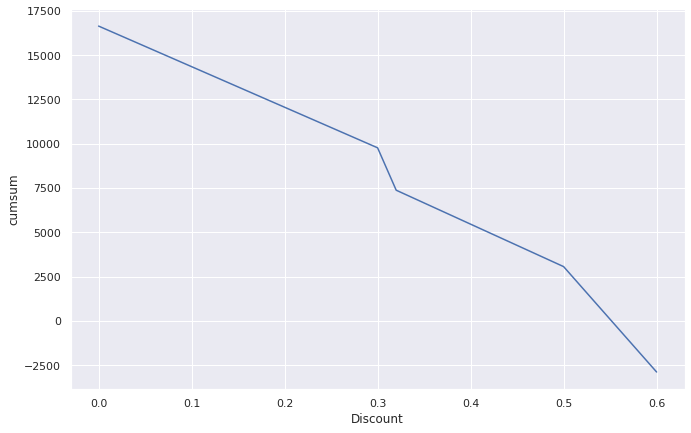

In [60]:
sns.lineplot(x = 'Discount', y = 'cumsum', data = us_furn_discount)
plt.show()

Notiamo che il profitto scende piuttosto velocemente, ma è interessante notare come il profitto totale diventa negativo solo una volta oltrepassata la soglia del 50% di sconto. 

Sarebbe interessante vedere questo grafico su tutte le categorie, in modo da poter confrontare le diverse velocità tra categoria; per fare ciò, partiamo dal Data Frame `us` e ripercorriamo i passi appena visti, ma questa volta aggiungendo anche `Sub-Category` nella group by: 

In [61]:
us_discount = us.groupby(['Sub-Category', 'Discount'], as_index = False)['Profit'].sum()
us_discount.head(3)

,Sub-Category,Discount,Profit
0,Accessories,0.0,35289.2539
1,Accessories,0.2,6647.3818
2,Appliances,0.0,23183.7361


In [62]:
us_discount['Cumulative Sum of Profit'] = us_discount.groupby('Sub-Category', as_index = False)['Profit'].cumsum()
us_discount.head()

,Sub-Category,Discount,Profit,Cumulative Sum of Profit
0,Accessories,0.0,35289.2539,35289.2539
1,Accessories,0.2,6647.3818,41936.6357
2,Appliances,0.0,23183.7361,23183.7361
3,Appliances,0.1,1086.0808,24269.8169
4,Appliances,0.2,2497.8297,26767.6466


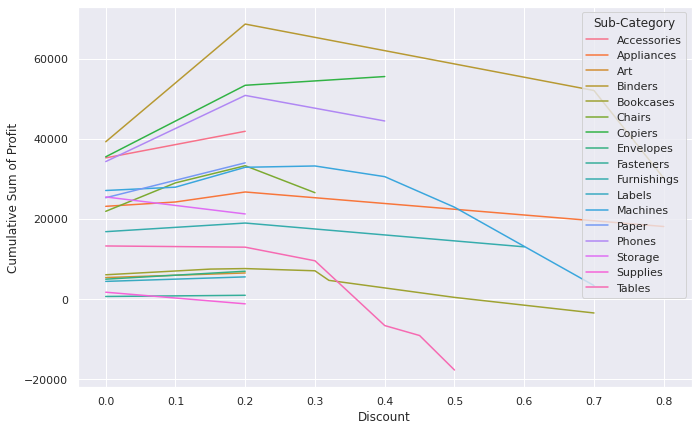

In [63]:
sns.lineplot(x = 'Discount', y = 'Cumulative Sum of Profit', hue = 'Sub-Category', data = us_discount)
plt.show()

Notiamo come la categoria Tables sia quella che scende più velocemente sotto lo zero. Notiamo anche che non tutti i livelli di sconto hanno un effetto negativo, anzi, in alcune categorie, sconti moderati entro il 20% hanno un effetto positivo sul margine totale, che va poi a scendere man mano che la soglia di sconto si alza (vedi ad esempio la categoria Binders). 

## Conclusioni 

*  Abbiamo capito che c'è una relazione negativa tra sconto e margine e che le sottocategorie "Furnishing" e "Tables" sono le più problematiche. 

*  È chiaro che alcuni prodotti in questa sottocategoria sono alla base del margine negativo che abbiamo registrato a livello aggregato. Questi prodotti sono stati fortemente scontati e pertanto non sono profittevoli.

*  Abbiamo altresì notato che sembra esserci una soglia di sconto sotto la quale i margini rimangono positivi e anzi, in alcune categorie, livelli moderati di sconto hanno un effetto positivo sul margine totale. 

*  Quindi una possibile strategia è quella di applicare una politica di sconto che non superi una certa soglia variabile e stabilita in base alla categoria o sottocategoria in esame.

*  Un'analisi più mirata e approfondita potrebbe andare a esplorare i prodotti più problematici, in modo da poterli segnalare al team responsabile. Un altro punto da approfondire è l'effetto che le quantità acquistate hanno sui margini e, di conseguenza, sull'efficacia delle diverse politiche di sconto sul margine totale. 

# Esercizi per casa

1. Crea un Data Frame che mostri i **5 prodotti** più problematici dal punto di vista del profitto per la sotto-categoria `Tables` nella regione `Central`. 
2. Ripeti la stessa operazione fatta qua sopra ma per la regione `East`. 
3. Ci sono dei prodotti problematici in comune tra le due regioni? Se sì, quali?

In [64]:
us[(us['Sub-Category']=='Tables') & (us['Region']=='Central')].groupby('Product Name', as_index = False)['Profit'].sum().sort_values('Profit').head()

,Product Name,Profit
7,"Bevis Oval Conference Table, Walnut",-600.2540
13,BoxOffice By Design Rectangular and Half-Moon ...,-566.5625
16,Bretford “Just In Time” Height-Adjustable Mult...,-538.4460
34,Hon Rectangular Conference Tables,-525.6405
5,Bevis 44 x 96 Conference Tables,-337.6760


In [65]:
us[(us['Sub-Category']=='Tables') & (us['Region']=='East')].groupby('Product Name', as_index = False)['Profit'].sum().sort_values('Profit').head()

,Product Name,Profit
39,"Riverside Furniture Oval Coffee Table, Oval En...",-1187.5590
18,"Chromcraft Bull-Nose Wood 48"" x 96"" Rectangula...",-754.8426
29,Hon 94000 Series Round Tables,-734.5264
6,"Bevis Oval Conference Table, Walnut",-720.3048
13,Bretford Rectangular Conference Table Tops,-605.5693
